In [3]:
import os


In [2]:
token=os.getenv('ACCESS_TOKEN')
token_secret=os.getenv('ACCESS_TOKEN_SECRET')
consumer_key=os.getenv('CONSUMER_KEY')
consumer_secret=os.getenv('CONSUMER_SECRET')

In [3]:
import twitter
api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=token,
                  access_token_secret=token_secret,
                  sleep_on_rate_limit=True
                )

In [4]:
api

# Tweeters using the Hashtag #shdb17

In [5]:
tweets = api.GetSearch(raw_query='q=%23shdb17&count=100&since_id=2017-10-01')
science_hack_tweeters = {tweet.user.id: tweet.user.screen_name for tweet in tweets}
science_hack_tweeters

{15772640: 'ramin__',
 19071614: 'hirbel',
 21995182: 'katausten',
 40774011: 'luizalbd',
 73082628: 'talknewvic',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 274071475: 'UCLbasc',
 307615698: 'Cassandreces',
 700611380: 'rikunert',
 1243981704: 'katihappyy'}

# Followers of a user

In [6]:
#followers_shd_berlin = api.GetFollowers(user_id='1531582164', total_count=5, skip_status=True)

In [7]:
#followers_shd_berlin

In [8]:
#followers_shd_berlin[0].screen_name

# Members of the SHDB17 Twitter list 
https://twitter.com/SHD_Berlin/lists/shd-berlin-2017

In [9]:
api.GetLists(user_id='1531582164')

[List(ID=928630046448848897, FullName='@SHD_Berlin/shd-berlin-2017', Slug=shd-berlin-2017, User=SHD_Berlin),
 List(ID=873203403538796544, FullName='@SHD_Berlin/shdb17-orga-team', Slug=shdb17-orga-team, User=SHD_Berlin),
 List(ID=779484881285963776, FullName='@SHD_Berlin/shd-berlin-2016', Slug=shd-berlin-2016, User=SHD_Berlin),
 List(ID=230990707, FullName='@SHD_Berlin/berlin-community', Slug=berlin-community, User=SHD_Berlin),
 List(ID=223103221, FullName='@SHD_Berlin/shd-berlin-2015', Slug=shd-berlin-2015, User=SHD_Berlin),
 List(ID=175486869, FullName='@SHD_Berlin/shd-berlin-2014', Slug=shd-berlin-2014, User=SHD_Berlin)]

In [10]:
science_hackers = {user.id: user.screen_name for user in api.GetListMembers(list_id='928630046448848897')}
science_hackers

{11712822: 'li5a',
 14947781: 'onna_no_hito',
 15772640: 'ramin__',
 19071614: 'hirbel',
 21492460: 'ellen_koenig',
 21995182: 'katausten',
 29342035: 'PCH_Intl',
 40774011: 'luizalbd',
 51757957: 'genekogan',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 165745785: 'Mboathomas',
 202275865: 'xMartin',
 226237233: 'arnejenssen',
 307615698: 'Cassandreces',
 326840157: 'dadafoto',
 333494575: 'meredityman',
 378694453: 'sarahhermanutz',
 1112710856: 'AravinthPanch',
 1243981704: 'katihappyy',
 1637049138: 'GoodpatchBerlin',
 2203330990: 'Rick_Scavetta',
 2675053819: 'giu_pap',
 2809668737: 'lukeidesign',
 2867007903: 'robertkovax',
 4414975041: 'Th_Heidtmann',
 715590200794222593: 'sciencejoram',
 804277319510724609: 'nbt_ag',
 819927704850038785: 'eLifeInnovation',
 821041513836724224: 'Volpato1985'}

In [11]:
all_users = {**science_hack_tweeters,  **science_hackers, **{1531582164:'SHD_Berlin'}}
len(all_users)

34

In [12]:
# Hack to limit the user list to 15

all_tweeters = {**science_hack_tweeters,  **science_hackers, **{1531582164: 'SHD_Berlin'}}

#only_11_users = dict(all_tweeters[0:10])

only_11_users = all_tweeters
#only_11_users[1531582164]='SHD_Berlin'
only_11_users

{11712822: 'li5a',
 14947781: 'onna_no_hito',
 15772640: 'ramin__',
 19071614: 'hirbel',
 21492460: 'ellen_koenig',
 21995182: 'katausten',
 29342035: 'PCH_Intl',
 40774011: 'luizalbd',
 51757957: 'genekogan',
 73082628: 'talknewvic',
 77477607: 'derjoram',
 99586343: 'lu_cyP',
 165745785: 'Mboathomas',
 202275865: 'xMartin',
 226237233: 'arnejenssen',
 274071475: 'UCLbasc',
 307615698: 'Cassandreces',
 326840157: 'dadafoto',
 333494575: 'meredityman',
 378694453: 'sarahhermanutz',
 700611380: 'rikunert',
 1112710856: 'AravinthPanch',
 1243981704: 'katihappyy',
 1531582164: 'SHD_Berlin',
 1637049138: 'GoodpatchBerlin',
 2203330990: 'Rick_Scavetta',
 2675053819: 'giu_pap',
 2809668737: 'lukeidesign',
 2867007903: 'robertkovax',
 4414975041: 'Th_Heidtmann',
 715590200794222593: 'sciencejoram',
 804277319510724609: 'nbt_ag',
 819927704850038785: 'eLifeInnovation',
 821041513836724224: 'Volpato1985'}

# Build and visualize as simple NetworkX graph from the Twitter data

In [4]:
import networkx as nx

graph = None
graph = nx.DiGraph()

In [14]:
def add_shdb_related_followers_to_graph(graph, user_id, user_name, all_users):
    followers = api.GetFollowers(user_id=user_id, total_count=5000, include_user_entities=False, skip_status=True)
    for follower in followers:
        if follower.id in all_users:
            graph.add_node(user_name, id=user_id)
            graph.add_node(follower.screen_name, id=follower.id)
            graph.add_edge(follower.screen_name, user_name)

In [15]:
for user in only_11_users:
    print("user: ", only_11_users[user])
    add_shdb_related_followers_to_graph(graph, user, only_11_users[user], only_11_users)

user:  Volpato1985
user:  eLifeInnovation
user:  talknewvic
user:  genekogan
user:  sciencejoram
user:  katihappyy
user:  Rick_Scavetta
user:  xMartin
user:  robertkovax
user:  nbt_ag
user:  lu_cyP
user:  katausten
user:  meredityman
user:  arnejenssen
user:  GoodpatchBerlin
user:  UCLbasc
user:  rikunert
user:  sarahhermanutz
user:  li5a
user:  Th_Heidtmann
user:  onna_no_hito
user:  AravinthPanch
user:  Cassandreces
user:  PCH_Intl
user:  SHD_Berlin
user:  dadafoto
user:  ramin__
user:  giu_pap
user:  derjoram
user:  ellen_koenig
user:  lukeidesign
user:  Mboathomas
user:  luizalbd
user:  hirbel


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

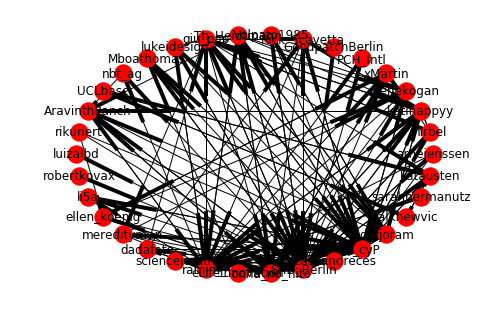

In [12]:
pos=nx.circular_layout(graph)
nx.draw(graph, pos, with_labels=True)

plt.savefig("graph.pdf")

In [18]:
#pickle.dump(graph, open("basic_graph.p", "wb"))

In [19]:
graph.number_of_nodes()

34

In [20]:
graph.number_of_edges()

170

In [21]:
#graph = pickle.load(open("basic_graph.p", "rb"))

In [22]:
#nx.write_gpickle(graph, "complete_graph.p")

In [3]:
import networkx as nx
graph = nx.read_gpickle('complete_graph.p')

# Mögliche Visualisierungsdaten pro Node
 * Follower counts
 * Centrality 

In [24]:
betweenness = nx.betweenness_centrality(graph, normalized=True)
in_degree = nx.in_degree_centrality(graph)
out_degree = nx.out_degree_centrality(graph)
closeness = nx.closeness_centrality(graph)

for node in graph.nodes(data=True):
    node[1]['betweenness'] = betweenness[node[0]]
    node[1]['in_degree'] = in_degree[node[0]]
    node[1]['out_degree'] = out_degree[node[0]]
    node[1]['closeness'] = closeness[node[0]]
    print(node)

('arnejenssen', {'closeness': 0.39820075757575757, 'out_degree': 0.09090909090909091, 'id': 226237233, 'betweenness': 0.0, 'in_degree': 0.030303030303030304})
('hirbel', {'closeness': 0.4319465844889574, 'out_degree': 0.15151515151515152, 'id': 19071614, 'betweenness': 0.000946969696969697, 'in_degree': 0.12121212121212122})
('katihappyy', {'closeness': 0.4900932400932401, 'out_degree': 0.2727272727272727, 'id': 1243981704, 'betweenness': 0.0069482022607022615, 'in_degree': 0.2727272727272727})
('genekogan', {'closeness': 0.45508658008658015, 'out_degree': 0.09090909090909091, 'id': 51757957, 'betweenness': 0.0014993686868686868, 'in_degree': 0.18181818181818182})
('xMartin', {'closeness': 0.44710260499734183, 'out_degree': 0.06060606060606061, 'id': 202275865, 'betweenness': 0.006731000481000481, 'in_degree': 0.15151515151515152})
('PCH_Intl', {'closeness': 0.43290043290043284, 'out_degree': 0.0, 'id': 29342035, 'betweenness': 0.0, 'in_degree': 0.06060606060606061})
('GoodpatchBerlin'

## Ranges

In [25]:
(min(betweenness.values()), max(betweenness.values()))

(0.0, 0.41497865560365566)

In [26]:
(min(in_degree.values()), max(in_degree.values()))

(0.0, 0.6666666666666667)

In [27]:
(min(out_degree.values()), max(out_degree.values()))

(0.0, 0.7878787878787878)

In [28]:
(min(closeness.values()), max(closeness.values()))

(0.0, 0.7079124579124579)

# Next steps

* Visualize the network metrics (with matplotlib), e.g. color the nodes for each metric
* Find a way to clarify the network graph (try different layouts or just the cluster nodes in the middle?) https://networkx.github.io/documentation/stable/reference/drawing.html

# Audiolazy example

In [24]:
from audiolazy import *

rate = 44100 # Sampling rate, in samples/second
s, Hz = sHz(rate) # Seconds and hertz
ms = 1e-3 * s
note1 = karplus_strong(440 * Hz, tau=1000 * ms) # Pluck "digitar" synth
note2 = zeros(1200 * ms).append(karplus_strong(880 * Hz))
note3 = zeros(1500 * ms).append(karplus_strong(220 * Hz))


notes = (note1 + note2 + note3) *1 #fadeout(900 * ms)
sound = notes.take(int(10 * s)) # 10 seconds of the stream
with AudioIO(True) as player: # True means "wait for all sounds to stop"
  player.play(sound, rate=rate)

## Basic idea
Notes are streams, adding them makes them play simultaneously
Breaks are added as "zeros".

## Configurable parameters

* pitch of the notes (440, 880,...)
* number of notes
* duration of the stream (note.take)
* length of a note (tau)
* breaks (zeros)
* volume notes = (note1 + note2) * volume (0..1)

## Pentatonic scale to make the sounds more harmonious 

> Now we know all the frequencies of the pitches in a pentatonic scale, it's just a matter of dividing by 2 until we get to the right octave. All the frequencies need to end up between 440 and 880.

> A = 440
> B = 990 / 2 = 495
> C# = 2227.5 / 4 = 556.875
> E = 660
> F# = 1485 / 2 = 742.5

Source: https://music.stackexchange.com/questions/42212/how-to-get-frequencies-for-the-major-and-minor-pentatonic-scales

## Concept

One stream per node combined into one stream.

Use the following note parameters
* Pitch (1 out of the 5 tones from the pentatonic scale) - range 0...4 -- round(value * 4)
* Length  - round(value * 2000)
* Volume (on individual stream) -- value
* Pause after note -- round(value * 3000)

Count the total current length by adding the breaks and note durations

In [91]:
from audiolazy import *

rate = 44100 # Sampling rate, in samples/second
pentatonic_scale = [440, 495, 556.875, 660, 742.5]
s, Hz = sHz(rate) # Seconds and hertz
ms = 1e-3 * s

notes = []

for node in graph.nodes(data=True):
    pitch = round(node[1]['closeness'] * 4)
    length = round(node[1]['in_degree'] * 10000)
    volume = node[1]['out_degree']
    pause = round(node[1]['betweenness'] * 2000)
    print (pitch, length, volume, pause)
    note = zeros(pause * ms).append(karplus_strong(pentatonic_scale[pitch] * Hz, tau=(length + 0.001)* ms)) * volume
    notes.append(note)
    current_track_length = length + pause
    sound = note.take(int((current_track_length + 1000) * ms)) # 100 seconds of the stream
    with AudioIO(True) as player: # True means "wait for all sounds to stop"
      player.play(sound, rate=rate)

2 303 0.09090909090909091 0
2 1212 0.15151515151515152 2
2 2727 0.2727272727272727 14
2 1818 0.09090909090909091 3
2 1515 0.06060606060606061 13
2 606 0.0 0
2 303 0.030303030303030304 0
2 1515 0.15151515151515152 1
2 606 0.09090909090909091 0
2 1818 0.2727272727272727 5
2 2727 0.3939393939393939 48
2 1212 0.12121212121212122 0
2 1212 0.030303030303030304 0
2 606 0.030303030303030304 0
1 606 0.06060606060606061 0
2 2121 0.12121212121212122 59
0 0 0.09090909090909091 0
2 303 0.0 0
2 303 0.0 0
2 909 0.030303030303030304 0
1 909 0.12121212121212122 19
2 606 0.15151515151515152 0
2 606 0.15151515151515152 1
2 909 0.0 0
2 4545 0.48484848484848486 228
2 303 0.09090909090909091 0
2 3636 0.24242424242424243 101
3 6667 0.7878787878787878 830
2 303 0.06060606060606061 0


KeyboardInterrupt: 